Experiment 1 with IAM dataset
============================================

In [10]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
import time
import os
from utils import *
from classes import *

use_gpu = torch.cuda.is_available()

print('main imports complete')

main imports complete


In [11]:
# ========================================
# Step 1. define data transform
#
# Including different forms of data augmentation
# One will include nearly all types (excluding random crops, etc. that may remove handwriting.)
# The other will include a selected set of augmentations
# Keeping 'train', 'val', and 'test' transforms just in case we want to include different functionalities
# ========================================

# Need the __name__ check to make multiprocessing work on Windows for some reason
# if __name__ == '__main__':
print("Set up data transforms.")
img_input_size = 56

selected_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # RandomRotation does not seem to be working on Windows right now
        transforms.RandomRotation(45),

        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5),
        transforms.RandomGrayscale(p=0.1),

        transforms.Grayscale(), # not sure why the current input is not grayscale, do grayscale conversion
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    # should not do random transformation in val or test set
    'val': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
}

net1_data_transforms = {
    'train': transforms.Compose([
#         transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

# data_transforms = selected_transforms
data_transforms = net1_data_transforms


Set up data transforms.


In [12]:
all_data_dir = '/home/rahul/data/handwriting/sampled/dim64x64-stride8x8/train_val_test-3'
set_types = ['train', 'val', 'test']

imagefolders = {t : datasets.ImageFolder(os.path.join(all_data_dir, t),
                                        transform = data_transforms[t])
               for t in set_types}
for t in set_types:
    print(str(t) + ' count:', len(imagefolders[t]))

train count: 7723
val count: 3478
test count: 2115


device_name cuda
Creating Net1.

Epoch 0/499
----------
Phase:train
average loss: 0.3106363988244501
f1_pos: 0.8845507433742728
f1_neg: 0.8841914148618856

Phase:val
average loss: 0.39540576456674836
f1_pos: 0.7570954662734979
f1_neg: 0.844685364129154


Epoch 1/499
----------
Phase:train
average loss: 0.1697773845823151
f1_pos: 0.9342661034846885
f1_neg: 0.9367217280813214

Phase:val
average loss: 0.5040816905479311
f1_pos: 0.8518405841192578
f1_neg: 0.8672662850913055


Epoch 2/499
----------
Phase:train
average loss: 0.15858080686798032
f1_pos: 0.9384311140408701
f1_neg: 0.9405927998982319

Phase:val
average loss: 0.6613950593640161
f1_pos: 0.8310502283105022
f1_neg: 0.8488150367747207


Epoch 3/499
----------
Phase:train
average loss: 0.1483636969816464
f1_pos: 0.9399815327793167
f1_neg: 0.9421487603305785

Phase:val
average loss: 0.8153358433971877
f1_pos: 0.8358121901428988
f1_neg: 0.8403742557414233


Epoch 4/499
----------
Phase:train
average loss: 0.15196908120932734
f1_pos: 0

Phase:val
average loss: 0.5976360922506858
f1_pos: 0.7639296187683284
f1_neg: 0.8476821192052979


Epoch 37/499
----------
Phase:train
average loss: 0.0982787762202393
f1_pos: 0.9552436440677966
f1_neg: 0.957182670382569

Phase:val
average loss: 0.906983887244395
f1_pos: 0.8491290227339829
f1_neg: 0.8568226393947884


Epoch 38/499
----------
Phase:train
average loss: 0.1003291878434918
f1_pos: 0.9530005310674455
f1_neg: 0.9552691432903716

Phase:val
average loss: 1.3088406639033312
f1_pos: 0.6509645580978016
f1_neg: 0.3771016813450761


Epoch 39/499
----------
Phase:train
average loss: 0.11066638309835122
f1_pos: 0.9540823077940983
f1_neg: 0.9560147040182533

Phase:val
average loss: 1.0603966407902012
f1_pos: 0.8247305728871241
f1_neg: 0.8198250728862974


Epoch 40/499
----------
Phase:train
average loss: 0.10065178434596876
f1_pos: 0.9551290536068829
f1_neg: 0.9570396654416424

Phase:val
average loss: 0.6450538422747409
f1_pos: 0.7275426874536005
f1_neg: 0.8277803847958705


Epoch 41/

Phase:val
average loss: 0.8556326854976174
f1_pos: 0.8483594442802246
f1_neg: 0.8564231738035264


Epoch 74/499
----------
Phase:train
average loss: 0.08827335117537942
f1_pos: 0.9591295116772823
f1_neg: 0.9610619469026549

Phase:val
average loss: 0.5789207548948456
f1_pos: 0.823020625415835
f1_neg: 0.8653164556962025


Epoch 75/499
----------
Phase:train
average loss: 0.08560934505122349
f1_pos: 0.9631488574824991
f1_neg: 0.9645714285714285

Phase:val
average loss: 0.783381930673993
f1_pos: 0.8363851151801536
f1_neg: 0.8448179271708685


Epoch 76/499
----------
Phase:train
average loss: 0.08129557299498957
f1_pos: 0.9588896232650364
f1_neg: 0.9605380027915239

Phase:val
average loss: 1.8017667685520244
f1_pos: 0.4477766287487074
f1_neg: 0.7873357228195937


Epoch 77/499
----------
Phase:train
average loss: 0.09186426604174586
f1_pos: 0.9580299218853436
f1_neg: 0.9598378309894844

Phase:val
average loss: 0.4678622920530976
f1_pos: 0.8372730387118876
f1_neg: 0.8823383700767898


Epoch 7

Phase:val
average loss: 0.7700075109571202
f1_pos: 0.8502297090352221
f1_neg: 0.8675155784340286


Epoch 111/499
----------
Phase:train
average loss: 0.07483689854299946
f1_pos: 0.9651254953764862
f1_neg: 0.9664804469273743

Phase:val
average loss: 0.7913000867619057
f1_pos: 0.7844827586206896
f1_neg: 0.856184084372004


Epoch 112/499
----------
Phase:train
average loss: 0.07530694127341613
f1_pos: 0.9635113696456901
f1_neg: 0.9649835067241818

Phase:val
average loss: 0.7100231902499251
f1_pos: 0.8283162421435659
f1_neg: 0.8680396643783371


Epoch 113/499
----------
Phase:train
average loss: 0.07797845830883053
f1_pos: 0.965097831835008
f1_neg: 0.9665059629535651

Phase:val
average loss: 0.9166381401601641
f1_pos: 0.699294898382414
f1_neg: 0.8404840484048406


Epoch 114/499
----------
Phase:train
average loss: 0.07323764909551302
f1_pos: 0.966381015161503
f1_neg: 0.96756137895942

Phase:val
average loss: 0.6898065373224387
f1_pos: 0.8290086493679308
f1_neg: 0.8698734177215189


Epoch 1

Phase:train
average loss: 0.0676165822226273
f1_pos: 0.9679894179894181
f1_neg: 0.9693127060613745

Phase:val
average loss: 0.7751880958547807
f1_pos: 0.8032728566346495
f1_neg: 0.8665862484921593


Epoch 148/499
----------
Phase:train
average loss: 0.06384361259591992
f1_pos: 0.9683987835515007
f1_neg: 0.9696815933020424

Phase:val
average loss: 0.651012168491346
f1_pos: 0.8347646856750257
f1_neg: 0.8810877626699628


Epoch 149/499
----------
Phase:train
average loss: 0.07126889504742147
f1_pos: 0.963718220338983
f1_neg: 0.9652900937420826

Phase:val
average loss: 0.9369847611698219
f1_pos: 0.8486701314582697
f1_neg: 0.8656716417910448


Epoch 150/499
----------
Phase:train
average loss: 0.07021489877904478
f1_pos: 0.964479070381619
f1_neg: 0.9658325924044202

Phase:val
average loss: 0.9728309984793946
f1_pos: 0.8517040221062327
f1_neg: 0.8694241686942418


Epoch 151/499
----------
Phase:train
average loss: 0.06772841014779325
f1_pos: 0.9668384198705245
f1_neg: 0.9681350768058905

Pha

Phase:train
average loss: 0.07438965757895624
f1_pos: 0.9628942486085345
f1_neg: 0.9645569620253165

Phase:val
average loss: 0.6842482107648087
f1_pos: 0.8592592592592592
f1_neg: 0.8865229810438847


Epoch 185/499
----------
Phase:train
average loss: 0.06546669886339561
f1_pos: 0.9672131147540983
f1_neg: 0.9685359045927429

Phase:val
average loss: 0.6446592546249683
f1_pos: 0.8315935977731386
f1_neg: 0.8814306712395884


Epoch 186/499
----------
Phase:train
average loss: 0.0666943201343005
f1_pos: 0.9667945495435903
f1_neg: 0.9681754786357297

Phase:val
average loss: 0.9199114705105497
f1_pos: 0.8467614533965245
f1_neg: 0.8720654180954893


Epoch 187/499
----------
Phase:train
average loss: 0.06812200048909693
f1_pos: 0.9663277432985606
f1_neg: 0.9676108217960117

Phase:val
average loss: 0.7989255035999796
f1_pos: 0.8509965200885796
f1_neg: 0.875889328063241


Epoch 188/499
----------
Phase:train
average loss: 0.07040473444609928
f1_pos: 0.9655446594222103
f1_neg: 0.9670886075949366

P

Phase:train
average loss: 0.0556900104112025
f1_pos: 0.9704016913319239
f1_neg: 0.9715663874079716

Phase:val
average loss: 0.8759109045048429
f1_pos: 0.7794606575544883
f1_neg: 0.8594963520828431


Epoch 222/499
----------
Phase:train
average loss: 0.06475061040251548
f1_pos: 0.96921654115471
f1_neg: 0.9704202107401295

Phase:val
average loss: 1.2274288438804675
f1_pos: 0.6906054279749478
f1_neg: 0.8375356281517211


Epoch 223/499
----------
Phase:train
average loss: 0.06434014328542836
f1_pos: 0.9664678595096091
f1_neg: 0.9679787368687508

Phase:val
average loss: 0.9870950973808525
f1_pos: 0.7680057908070937
f1_neg: 0.8471261626520391


Epoch 224/499
----------
Phase:train
average loss: 0.06477090561523441
f1_pos: 0.9673841278225274
f1_neg: 0.9686269528769211

Phase:val
average loss: 0.7888703381898693
f1_pos: 0.7970856102003643
f1_neg: 0.8677273806696746


Epoch 225/499
----------
Phase:train
average loss: 0.05054513399651901
f1_pos: 0.9746968898260412
f1_neg: 0.9755663018579792

Ph

Phase:train
average loss: 0.05494809557810266
f1_pos: 0.9722148716591691
f1_neg: 0.9733772819472618

Phase:val
average loss: 0.7376261272603167
f1_pos: 0.8388017118402281
f1_neg: 0.8911368015414257


Epoch 259/499
----------
Phase:train
average loss: 0.05129329327392127
f1_pos: 0.9736147757255936
f1_neg: 0.9745741164505466

Phase:val
average loss: 1.1327124234243944
f1_pos: 0.7359375000000001
f1_neg: 0.8462238398544131


Epoch 260/499
----------
Phase:train
average loss: 0.05593577318041108
f1_pos: 0.9716096659183941
f1_neg: 0.9726914772005589

Phase:val
average loss: 5.708743842872414
f1_pos: 0.6210103572183471
f1_neg: 0.19415730337078652


Epoch 261/499
----------
Phase:train
average loss: 0.06005016994346273
f1_pos: 0.9680836975235068
f1_neg: 0.9694743508549716

Phase:val
average loss: 1.1321889027704652
f1_pos: 0.7966654584994562
f1_neg: 0.8663330950679057


Epoch 262/499
----------
Phase:train
average loss: 0.05127004135091827
f1_pos: 0.9728584668343705
f1_neg: 0.9740276194096035


Phase:val
average loss: 0.7121298646638968
f1_pos: 0.8566576086956522
f1_neg: 0.8948155533399801


Epoch 295/499
----------
Phase:train
average loss: 0.04800414247938763
f1_pos: 0.9737085480248381
f1_neg: 0.9747365748381364

Phase:val
average loss: 0.903512818810582
f1_pos: 0.8656716417910448
f1_neg: 0.8888888888888888


Epoch 296/499
----------
Phase:train
average loss: 0.04792757967838379
f1_pos: 0.9724794919290817
f1_neg: 0.973630831643002

Phase:val
average loss: 1.4249553038787404
f1_pos: 0.7069256756756757
f1_neg: 0.8487358326068004


Epoch 297/499
----------
Phase:train
average loss: 0.04780862182976899
f1_pos: 0.9758797943851326
f1_neg: 0.9767145947321542

Phase:val
average loss: 4.083686146261775
f1_pos: 0.42666666666666664
f1_neg: 0.7884274749065144


Epoch 298/499
----------
Phase:train
average loss: 0.07282980726714673
f1_pos: 0.9657734146988591
f1_neg: 0.9673748103186647

Phase:val
average loss: 1.3463853914344222
f1_pos: 0.8474875110196886
f1_neg: 0.8539262594990149


Epo

Phase:train
average loss: 0.0414047961924131
f1_pos: 0.9775429326287979
f1_neg: 0.9784154393092941

Phase:val
average loss: 0.6368602003223118
f1_pos: 0.8806068601583112
f1_neg: 0.9077471967380224


Epoch 332/499
----------
Phase:train
average loss: 0.04331838516256792
f1_pos: 0.9735449735449735
f1_neg: 0.9746386000507228

Phase:val
average loss: 1.199342216377357
f1_pos: 0.8596491228070176
f1_neg: 0.8728767123287672


Epoch 333/499
----------
Phase:train
average loss: 0.039869426146873665
f1_pos: 0.9771918259723137
f1_neg: 0.9779926218038417

Phase:val
average loss: 1.076793508943708
f1_pos: 0.770151636073424
f1_neg: 0.870561797752809


Epoch 334/499
----------
Phase:train
average loss: 0.03633214109765963
f1_pos: 0.9780713342140027
f1_neg: 0.978923311325546

Phase:val
average loss: 0.5644328571071976
f1_pos: 0.8687719298245613
f1_neg: 0.9089137847053095


Epoch 335/499
----------
Phase:train
average loss: 0.041209608421576664
f1_pos: 0.9765047518479408
f1_neg: 0.9773824650571792

Pha

Phase:train
average loss: 0.036303237997546305
f1_pos: 0.9774018765693142
f1_neg: 0.9782967381647417

Phase:val
average loss: 1.4654033803405127
f1_pos: 0.6756946065841699
f1_neg: 0.48035914702581367


Epoch 369/499
----------
Phase:train
average loss: 0.035375523907072756
f1_pos: 0.9766213181878219
f1_neg: 0.9775238095238096

Phase:val
average loss: 0.5992140701408013
f1_pos: 0.8923988153998026
f1_neg: 0.9165177431707939


Epoch 370/499
----------
Phase:train
average loss: 0.04190663403645592
f1_pos: 0.9754163362410785
f1_neg: 0.9763959390862944

Phase:val
average loss: 2.0271433432120025
f1_pos: 0.672374943668319
f1_neg: 0.8465273379776229


Epoch 371/499
----------
Phase:train
average loss: 0.0384893558464682
f1_pos: 0.976725733932822
f1_neg: 0.9776763064434297

Phase:val
average loss: 0.6810161707866048
f1_pos: 0.8957602805227924
f1_neg: 0.9143754909662214


Epoch 372/499
----------
Phase:train
average loss: 0.04237088965664221
f1_pos: 0.9730733519034355
f1_neg: 0.9743265460983938


Phase:train
average loss: 0.03934528640741884
f1_pos: 0.9759004237288136
f1_neg: 0.9769445148213834

Phase:val
average loss: 0.523786543565896
f1_pos: 0.8915745856353591
f1_neg: 0.9226600985221675


Epoch 406/499
----------
Phase:train
average loss: 0.031692652262861366
f1_pos: 0.9779246530072704
f1_neg: 0.9788097957112042

Phase:val
average loss: 0.29749440708127495
f1_pos: 0.9250431778929189
f1_neg: 0.9465648854961832


Epoch 407/499
----------
Phase:train
average loss: 0.03696930276744418
f1_pos: 0.9771617161716173
f1_neg: 0.9780205818828611

Phase:val
average loss: 0.33509020352240193
f1_pos: 0.9190105049135887
f1_neg: 0.9403245942571785


Epoch 408/499
----------
Phase:train
average loss: 0.040815706060921705
f1_pos: 0.9752678217167041
f1_neg: 0.976284083703234

Phase:val
average loss: 0.4315094058115363
f1_pos: 0.9060402684563758
f1_neg: 0.9295774647887323


Epoch 409/499
----------
Phase:train
average loss: 0.038154513181784616
f1_pos: 0.977536997885835
f1_neg: 0.978420919014978

Phase:train
average loss: 0.03636607405019674
f1_pos: 0.9746650749436265
f1_neg: 0.9758441886935626

Phase:val
average loss: 0.5087723961381682
f1_pos: 0.8961228968544257
f1_neg: 0.9327333017527238


Epoch 443/499
----------
Phase:train
average loss: 0.03113428584824431
f1_pos: 0.9791226215644819
f1_neg: 0.9799441482609801

Phase:val
average loss: 0.5360945878253716
f1_pos: 0.8941856265799928
f1_neg: 0.930021495103893


Epoch 444/499
----------
Phase:train
average loss: 0.03320110997194276
f1_pos: 0.9786053882725833
f1_neg: 0.9794259588519177

Phase:val
average loss: 0.5279669031423697
f1_pos: 0.8962504550418638
f1_neg: 0.932287954383464


Epoch 445/499
----------
Phase:train
average loss: 0.03290932974081704
f1_pos: 0.9788639365918098
f1_neg: 0.9796851193499237

Phase:val
average loss: 0.5192161800190935
f1_pos: 0.8991068475024809
f1_neg: 0.9224510551741673


Epoch 446/499
----------
Phase:train
average loss: 0.03593724336131209
f1_pos: 0.9792793981786988
f1_neg: 0.9800482907612148

P

Phase:val
average loss: 3.6669431473072263
f1_pos: 0.6325782092772384
f1_neg: 0.2662645411460577


Epoch 479/499
----------
Phase:train
average loss: 0.04154304091376183
f1_pos: 0.9742910151073416
f1_neg: 0.9754430379746835

Phase:val
average loss: 0.4021223442138415
f1_pos: 0.9211559043881555
f1_neg: 0.946785456296653


Epoch 480/499
----------
Phase:train
average loss: 0.03370927072707894
f1_pos: 0.976953642384106
f1_neg: 0.9779635258358663

Phase:val
average loss: 0.6410374197896833
f1_pos: 0.7091051395773544
f1_neg: 0.642971501761127


Epoch 481/499
----------
Phase:train
average loss: 0.036534027128544165
f1_pos: 0.9760613675439758
f1_neg: 0.9770450221940393

Phase:val
average loss: 0.6876897073600949
f1_pos: 0.8752598752598753
f1_neg: 0.9115479115479115


Epoch 482/499
----------
Phase:train
average loss: 0.03428610041823477
f1_pos: 0.9799630899024518
f1_neg: 0.9806615776081424

Phase:val
average loss: 1.7834191009050955
f1_pos: 0.7461669505962522
f1_neg: 0.8706597222222222


Epo

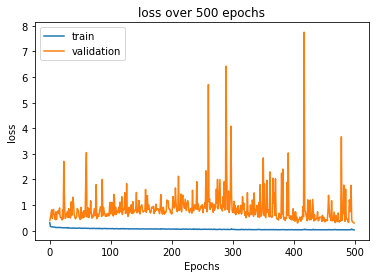

Average Training Score: 0.061982947146568865
Average Validation Score: 0.8775031587101846


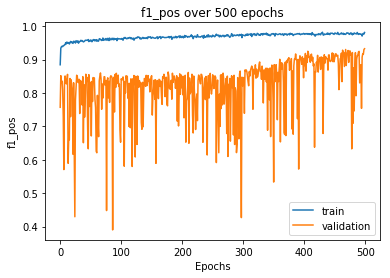

Average Training Score: 0.9687264821173588
Average Validation Score: 0.8203505932428163


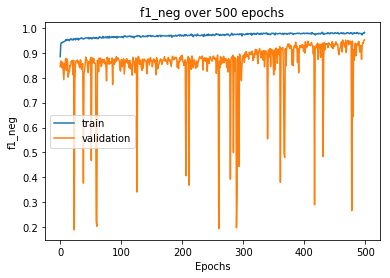

Average Training Score: 0.9699934879061882
Average Validation Score: 0.8601714937819757



In [15]:
from model_utils import create_model_architecture
from train_utils import train

use_gpu = True
device_name = 'cuda' if use_gpu else 'cpu'
print('device_name', device_name)

batch_size = 100

phases = ['train', 'val']
metric_types = ['loss', 'tn', 'fp', 'fn', 'tp', 'f1_pos', 'f1_neg']
metric_types_plot = ['loss', 'f1_pos', 'f1_neg']
metric_names_all = [p+'-'+m for p in phases for m in metric_types]
metric_names_plot = [p+'-'+m for p in phases for m in metric_types_plot]

all_metrics = {metric : [] for metric in metric_names_all}

num_training_epochs = 500

data_loaders = {t : torch.utils.data.DataLoader(imagefolders[t], batch_size = batch_size, shuffle = True, num_workers = 4)
                for t in phases}

model = create_model_architecture('net1', use_gpu = use_gpu)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, train_metrics = train(model,
                                     criterion,
                                     optimizer,
                                     data_loaders['train'],
                                     data_loaders['val'],
                                     num_epochs=num_training_epochs,
                                     use_gpu = use_gpu)

all_metrics = train_metrics

for metric in metric_types_plot:
    plot_values(all_metrics['train-' + str(metric)],
               all_metrics['val-' + str(metric)],
               str(metric) + " over " + str(num_training_epochs) + " epochs",
               ylabel = str(metric))

# write metrics to file
# write_metrics_to_csv(all_metrics, metric_names_all, 'net1-IAM-aa_64-raw_logs', 'all_metrics.csv')

print()


In [16]:
# write metrics to file
#write_metrics_to_csv(all_metrics, metric_names_all, 'net1-aa_64-raw_logs', 'all_metrics.csv')
torch.save(trained_model.state_dict(), 'models/net1-aa_64-500.pt')

In [6]:

# import sys
# import os
# sys.path.append(os.path.abspath('../../../'))
# from detection.lib.model.ImageROI import ImageROI
# from PIL import Image

# # book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# # img_loc = book_data_dir + '/Dryden/positive/307.png'
# # Testing with image of dimensions 1000x1381

# img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
# pilimg = Image.open(img_loc)
# w, h = pilimg.size
# imgrois = [ImageROI(0, 0, w, h)]
# imgarr = np.asarray(pilimg)

# from bounding_box_classification import get_pos_rois
# # net1 = Net1()

# # Modify this as necessary
# # imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
# trained_model.train(False)
# with torch.set_grad_enabled(False):
#     pos_rois = get_pos_rois(trained_model,
#                             (pilimg, imgrois),
#                             model_transform = net1_data_transforms['test'],
#                             model_input_size = (64,64),
#                             stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
# all_rois = [roi for rois in pos_rois for roi in rois]
    
# print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
# from detection.lib.utils.Utils import plt_img
# # plot the rois and plot only certain information according to the set
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
# plt_img(imgarr, rois=all_rois, roi_level_set=roi_level_set)

In [7]:

# import sys
# import os.path
# sys.path.append(os.path.abspath('../../../'))


# # from detection.lib.ImgProcessor import ImgProcessor
# import matplotlib.pyplot as plt
# import numpy as np
# from detection.lib.utils.Utils import *
# from detection.lib.OCREngine import OCREngine
# import pickle

# from PIL import Image

# # 1. parameters
# # root_dir = './sample'
# # img_id = '639'
# # fname = '%s.png' %img_id
# # ocr_engine = 'cv2'
# # f = '%s/%s' % (root_dir,fname)

# ocr_engine = 'tesseract'
# img_id = '1307'
# fname = '1307.png'
# f = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'

# # 2. Load the image
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=f)
# img = np.asarray(Image.open(f))

# # 3. preprocess the image
# # img = imgProcessor.quickPreprocess(img)

# # 4. load the image ground truth
# # img_roi_ground_truth = all_ground_truth[img_id]

# # 5. define the OCR
# # define engine
# ocr = OCREngine(ocr_engine)
# img_roi_ocr, data_df = ocr.image_to_data(img)

# # plot the rois and plot only certain information according to the set
# # roi_level_set = set([2])
# # rois = [(img_roi_ground_truth,'b'), (img_roi_ocr,'r')]
# rois = [(img_roi_ocr,'r')]
# plt_img(img, rois=rois)#, roi_level_set=roi_level_set)

# # save the plot
# plt.savefig('./result/%s_%s_boxes.png' %(fname,ocr_engine))

# # save the bounding boxes to txt
# # save_rois(img_roi_ground_truth,'./result/%s_imgROIs_ground_truth.txt' %fname)
# save_rois(img_roi_ocr,'./result/%s_imgROIs.txt' %fname)

# # save the bounding boxes to pickle
# # with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
# #     pickle.dump({'ocr':img_roi_ocr, 'ground_truth':img_roi_ground_truth},f)

